# Lab 2 Machine Learning 

## Marketing Digital Prevendo Número de Usuários Convertidos

**Descrição projeto**

Você foi contratado como Cientista de Dados por uma empresa que comercializa produtos digitais. A empresa trabalha diversas estratégias de Marketing Digital e gostaria de ter um modelo de Machine Learning capaz de prever quantos usuários serão convertidos (ou seja,quantas pessoas comprarão os produtos da empresa) após cada campanha. 

Conseguindo fazer a previsão, a empresa pode ter uma ideia mais clara de quanto deve investir em cada campanha e
o retorno esperado. Isso ajudará também no planejamento da empresa para comercialização e entrega do seu produto digital, além do uso de ferramentas e mídias sociais.

Dados históricos de campanhas passadas estão disponíveis e seu trabalho como Cientista de Dados é construir um modelo que, ao receber novos dados, seja capaz de prever o número de usuários convertidos em uma campanha de Marketing Digital. Além disso, o Gestor de Marketing precisa saber qual seria o aumento no número de usuários convertidos se aumentar em 1
unidade o valor gasto em uma campanha. 

Entretanto, os dados têm problemas (exatamente o que você encontrará no dia a dia) e você deve detectar esses problemas, decidir a melhor estratégia para resolvê-los e então criar seu modelo. Pode ser necessário criar diferentes versões do modelo até chegar ao modelo ideal. 

Quando chegar à versão ideal do modelo, você deve fornecer uma interpretação completa de como o modelo gera o resultado final para que os gestores tenham mais confiança no uso do modelo.

Por fim, você deve fornecer uma forma de fazer o deploy do modelo e usá-lo imediatamente com novos dados.

**Obejtivos**

**Problema 1** 

- Prever quantos usuários serão convertidos (ou seja,quantas pessoas comprarão os produtos da empresa) após cada campanha. 

**Problema 2**

- Qual o número provável de usuários convertidos?

## Importando bibliotecas

In [1]:
# Importação das bibliotecas 

# Bibliotecas sistema
import re
import random
import unicodedata
import itertools

# Biblioteca para manipulação de arquivos
import pandas as pd
import numpy as np 
from numpy.linalg import lstsq
from numpy.random import randn, seed

# Visualização de dados
import seaborn as sns
import matplotlib as m
import matplotlib as mpl
import matplotlib.pyplot as plt

# Carregar as versões das bibliotecas
import watermark

# Versões das bibliotecas
%reload_ext watermark
%watermark -a "Versões das bibliotecas" --iversions

# Configuração para os gráficos largura e layout dos graficos
plt.style.use('fivethirtyeight')

# Warnings retirar alertas 
import warnings
warnings.filterwarnings("ignore")

# Versão do python
from platform import python_version
print('Versão python neste Jupyter Notebook:', python_version())

Author: Versões das bibliotecas

pandas    : 2.0.3
seaborn   : 0.12.2
matplotlib: 3.7.2
watermark : 2.4.3
re        : 2.2.1
numpy     : 1.23.5

Versão python neste Jupyter Notebook: 3.9.13


## Base dados

In [2]:
# Base dados
data = pd.read_csv("dataset.csv")
data

,valor_gasto_campanha,numero_visualizacoes,numero_cliques,usuarios_convertidos
0,875,4390,54,30
1,1451,7120,90,72
2,1232,6198,67,47
3,1099,5554,70,63
4,656,3336,41,34
...,...,...,...,...
495,853,4281,57,32
496,1084,5650,80,61
497,578,2928,33,17
498,1474,7391,100,80


In [3]:
# Visualizando os 5 primeiros dados
data.head()

,valor_gasto_campanha,numero_visualizacoes,numero_cliques,usuarios_convertidos
0,875,4390,54,30
1,1451,7120,90,72
2,1232,6198,67,47
3,1099,5554,70,63
4,656,3336,41,34


In [4]:
# Visualizando os 5 últimos dados
data.tail()

,valor_gasto_campanha,numero_visualizacoes,numero_cliques,usuarios_convertidos
495,853,4281,57,32
496,1084,5650,80,61
497,578,2928,33,17
498,1474,7391,100,80
499,1486,7400,102,79


In [5]:
# Info dados
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 4 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   valor_gasto_campanha  500 non-null    int64
 1   numero_visualizacoes  500 non-null    int64
 2   numero_cliques        500 non-null    int64
 3   usuarios_convertidos  500 non-null    int64
dtypes: int64(4)
memory usage: 15.8 KB


In [6]:
# Tipo dados
data.dtypes

valor_gasto_campanha    int64
numero_visualizacoes    int64
numero_cliques          int64
usuarios_convertidos    int64
dtype: object

In [7]:
# Total de colunas e linhas 
print("Números de linhas: {}" .format(data.shape[0]))
print("Números de colunas: {}" .format(data.shape[1]))

Números de linhas: 500
Números de colunas: 4


In [8]:
# Exibindo valores ausentes e valores únicos
print("\nMissing values\n", data.isnull().sum().values.sum())
print("\nUnique values\n",data.nunique())


Missing values
 0

Unique values
 valor_gasto_campanha    399
numero_visualizacoes    476
numero_cliques           88
usuarios_convertidos     84
dtype: int64


In [9]:
# Verificando dados ausentes
data.isna().sum()

valor_gasto_campanha    0
numero_visualizacoes    0
numero_cliques          0
usuarios_convertidos    0
dtype: int64

In [10]:
# Dados duplicados
data.duplicated().sum()

0

## Features

In [11]:
# Crie uma lista com os valores 'Não comprou' e 'Comprou' de forma aleatória
valores = ['Não comprou', 'Comprou']
dados = [random.choice(valores) for _ in range(500)]

In [12]:
# Crie um DataFrame com uma coluna 'X' usando os valores aleatórios
df = pd.DataFrame({'Compras': dados})
df

,Compras
0,Não comprou
1,Não comprou
2,Não comprou
3,Comprou
4,Comprou
...,...
495,Comprou
496,Comprou
497,Comprou
498,Comprou


In [17]:
# Use a função concat para concatenar ao longo das colunas (horizontal)
data = pd.concat([data, df], axis=1)
data

,valor_gasto_campanha,numero_visualizacoes,numero_cliques,usuarios_convertidos,Compras
0,875,4390,54,30,Não comprou
1,1451,7120,90,72,Não comprou
2,1232,6198,67,47,Não comprou
3,1099,5554,70,63,Comprou
4,656,3336,41,34,Comprou
...,...,...,...,...,...
495,853,4281,57,32,Comprou
496,1084,5650,80,61,Comprou
497,578,2928,33,17,Comprou
498,1474,7391,100,80,Comprou


In [132]:
# Mundando os tipo de dados de object para string 
data["Compras"] = data["Compras"].astype(str)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   valor_gasto_campanha  500 non-null    int64 
 1   numero_visualizacoes  500 non-null    int64 
 2   numero_cliques        500 non-null    int64 
 3   usuarios_convertidos  500 non-null    int64 
 4   Compras               500 non-null    object
dtypes: int64(4), object(1)
memory usage: 19.7+ KB


## Análise exploratória de dados

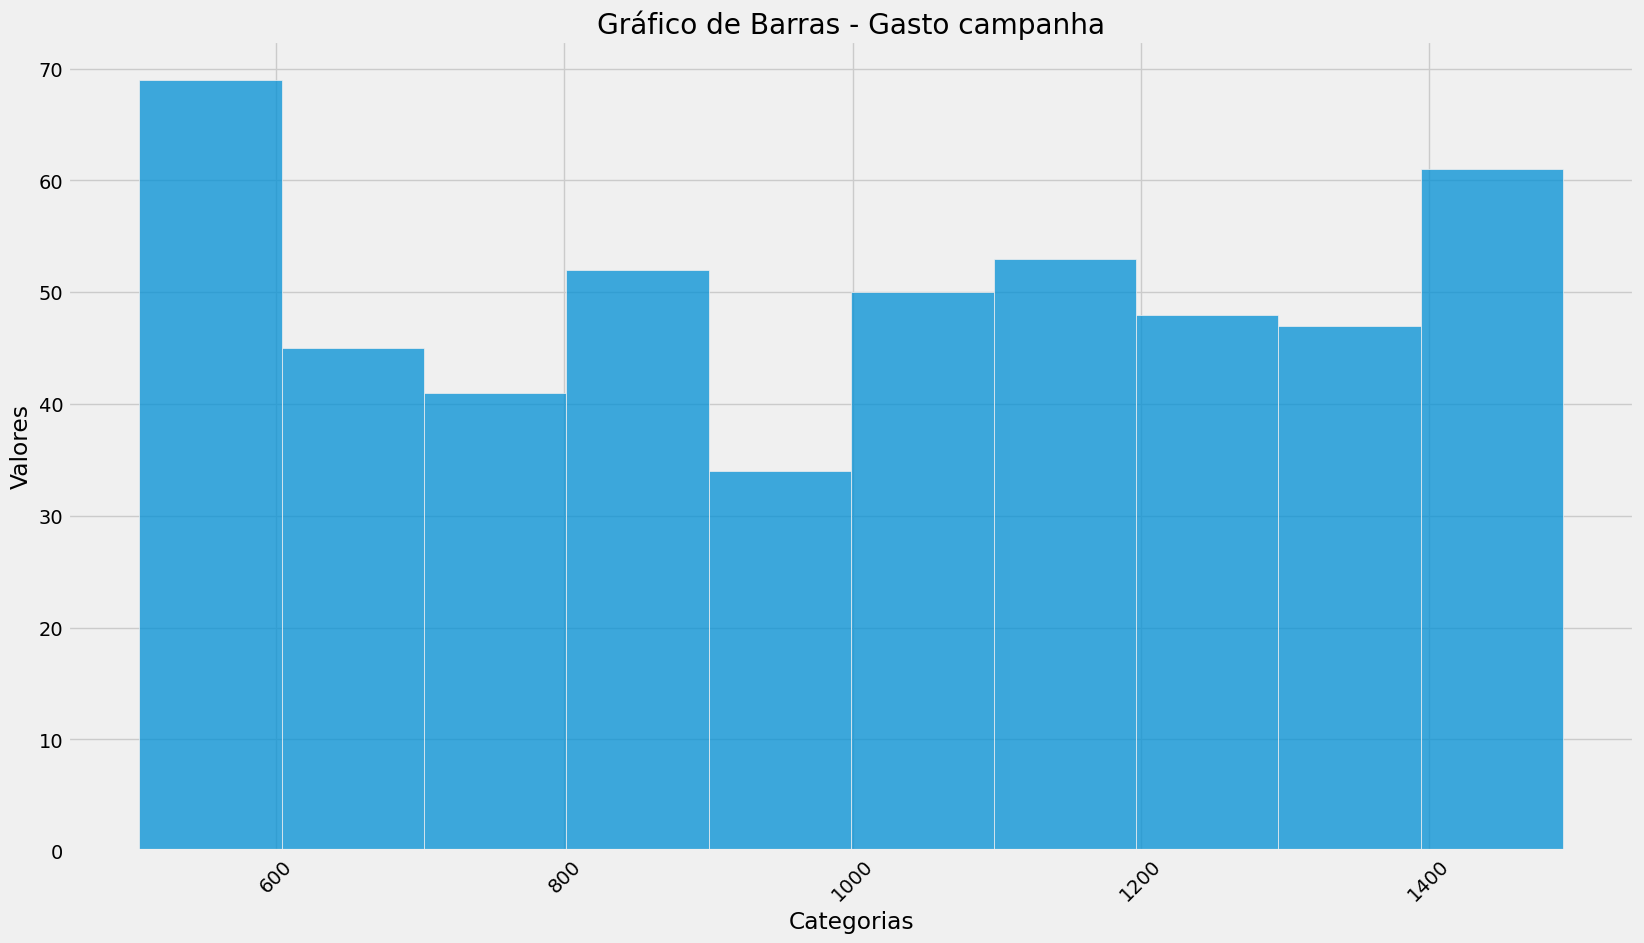

In [134]:
# Gráfico de barras valor gasto campanha 
plt.figure(figsize=(18, 10))
sns.histplot(data["valor_gasto_campanha"])
plt.xlabel('Categorias')
plt.ylabel('Valores')
plt.title('Gráfico de Barras - Gasto campanha')
plt.xticks(rotation=45)

# Exiba o gráfico
plt.show()

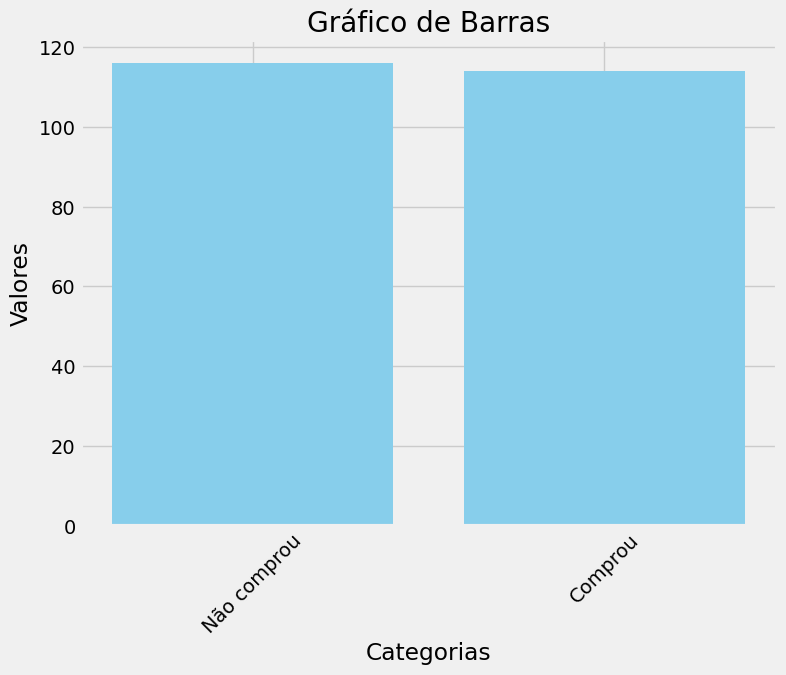

In [27]:
# Gráfico de barras numero cliques e compras
plt.figure(figsize=(8, 6))
plt.bar(data.Compras, data.numero_cliques, color='skyblue')
plt.xlabel('Categorias')
plt.ylabel('Valores')
plt.title('Gráfico de Barras')
plt.xticks(rotation=45)

# Exiba o gráfico
plt.show()

Text(0, 0.5, 'Usuários Convertidos')

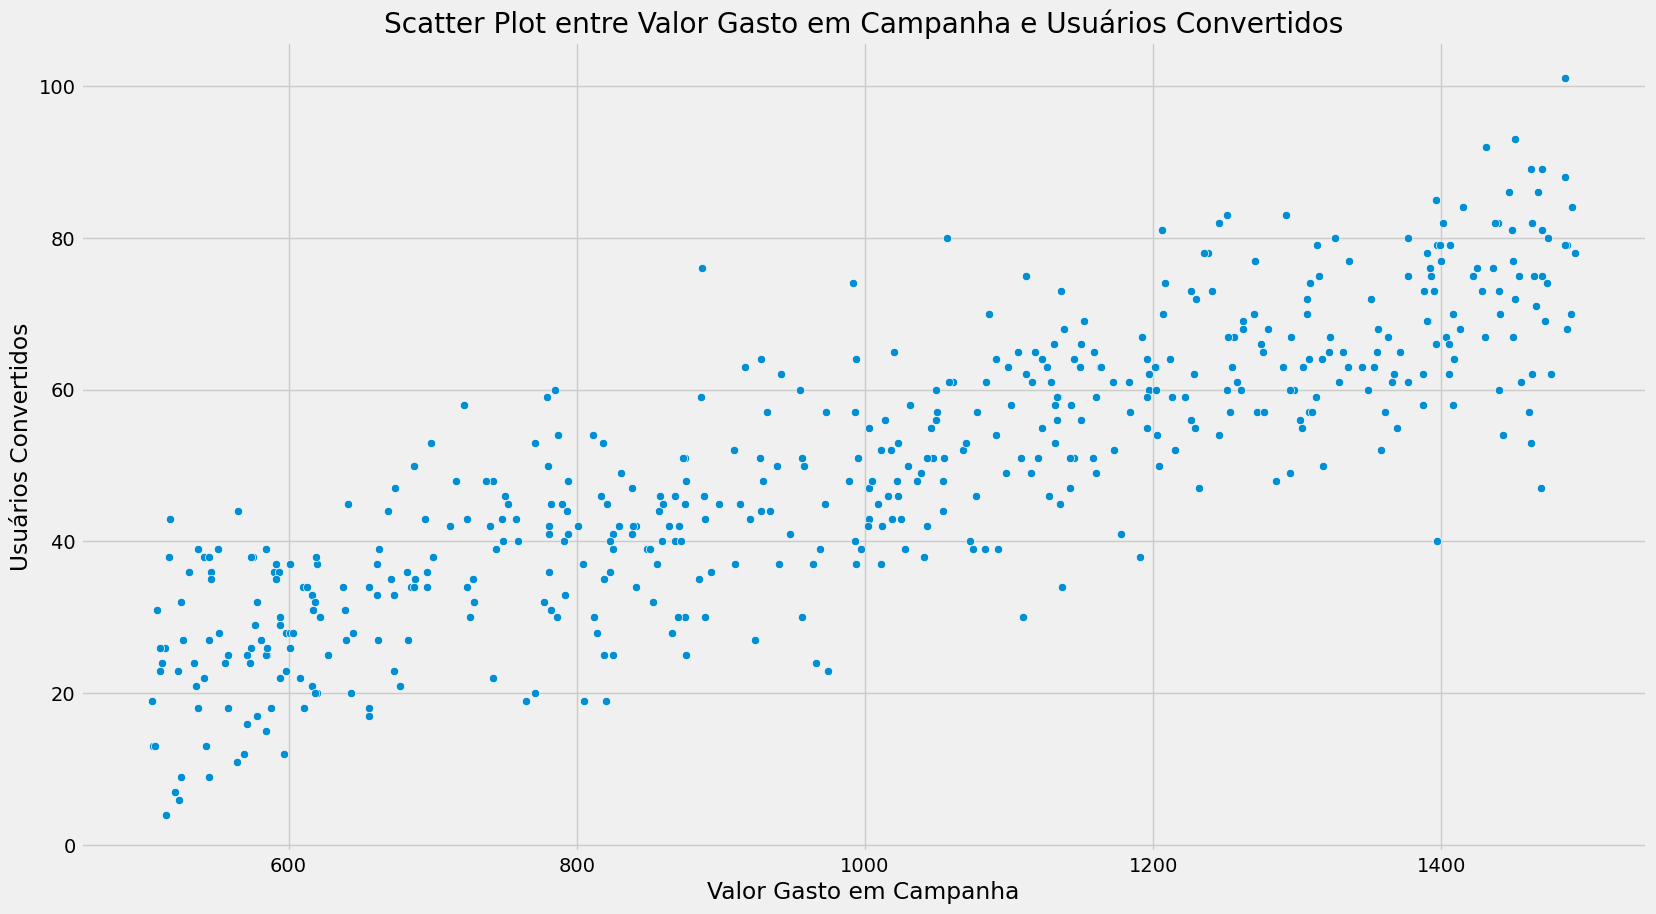

In [28]:
# Gráfico scatter plot entre Valor Gasto em Campanha e Usuários Convertidos

plt.figure(figsize=(18, 10))
sns.scatterplot(x="valor_gasto_campanha", y="usuarios_convertidos", data=data)
plt.title("Scatter Plot entre Valor Gasto em Campanha e Usuários Convertidos")
plt.xlabel("Valor Gasto em Campanha")
plt.ylabel("Usuários Convertidos")

Text(0, 0.5, 'Usuários Convertidos')

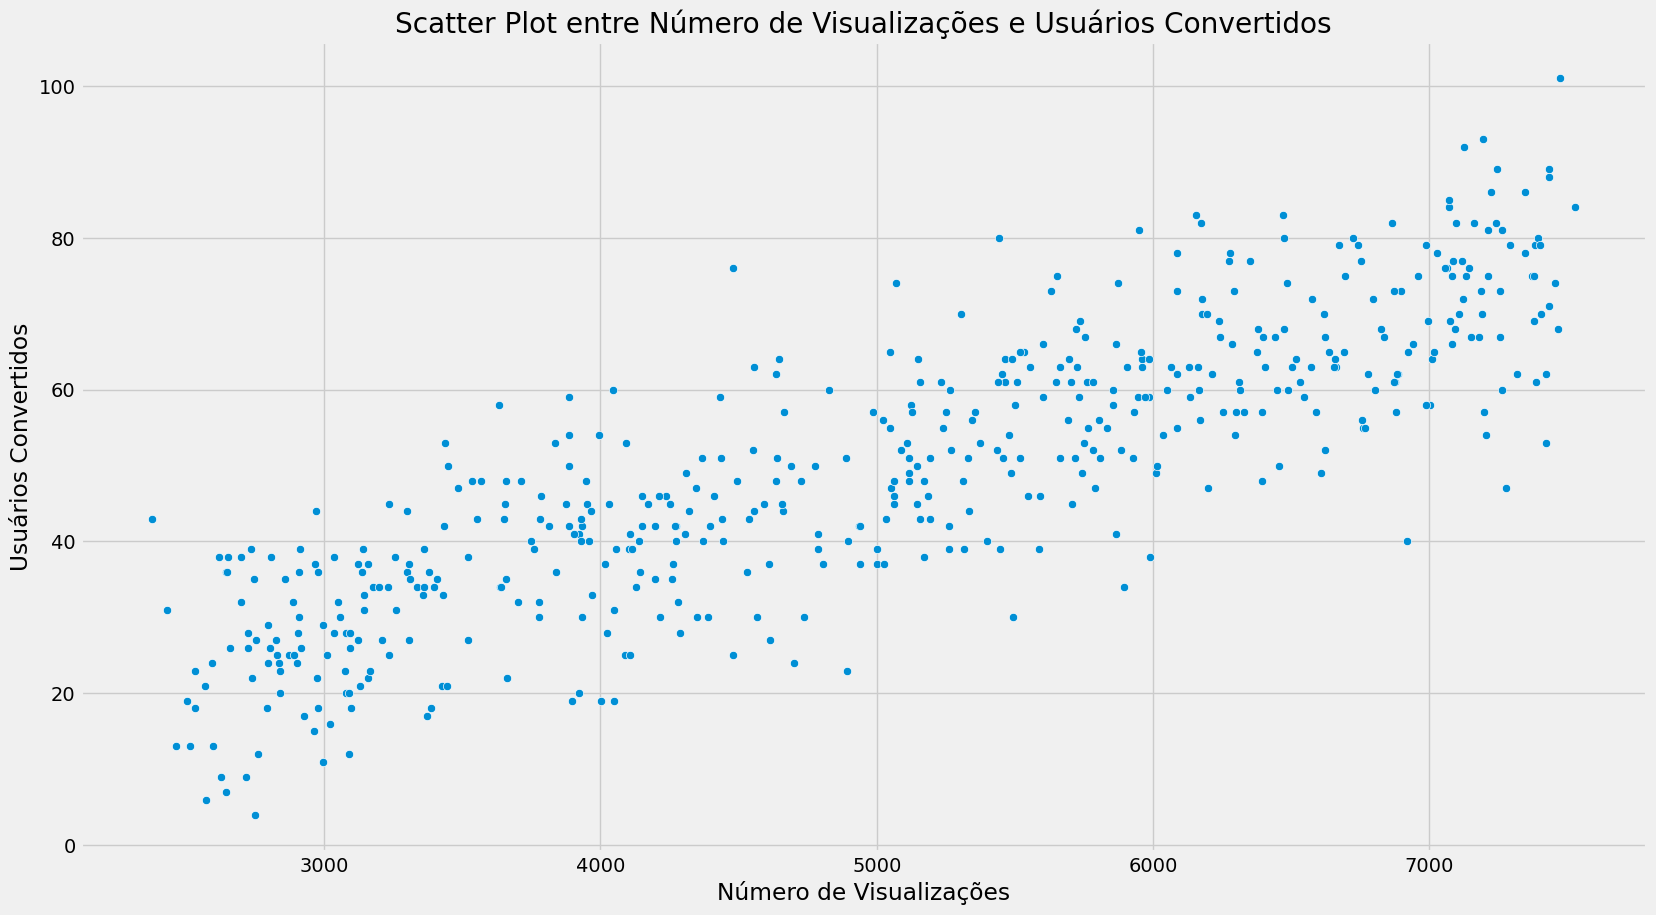

In [29]:
# plot entre Número de Visualizações e Usuários Convertidos
plt.figure(figsize=(18, 10))
sns.scatterplot(x="numero_visualizacoes", y="usuarios_convertidos", data = data)
plt.title("Scatter Plot entre Número de Visualizações e Usuários Convertidos")
plt.xlabel("Número de Visualizações")
plt.ylabel("Usuários Convertidos")

Text(0, 0.5, 'Usuários Convertidos')

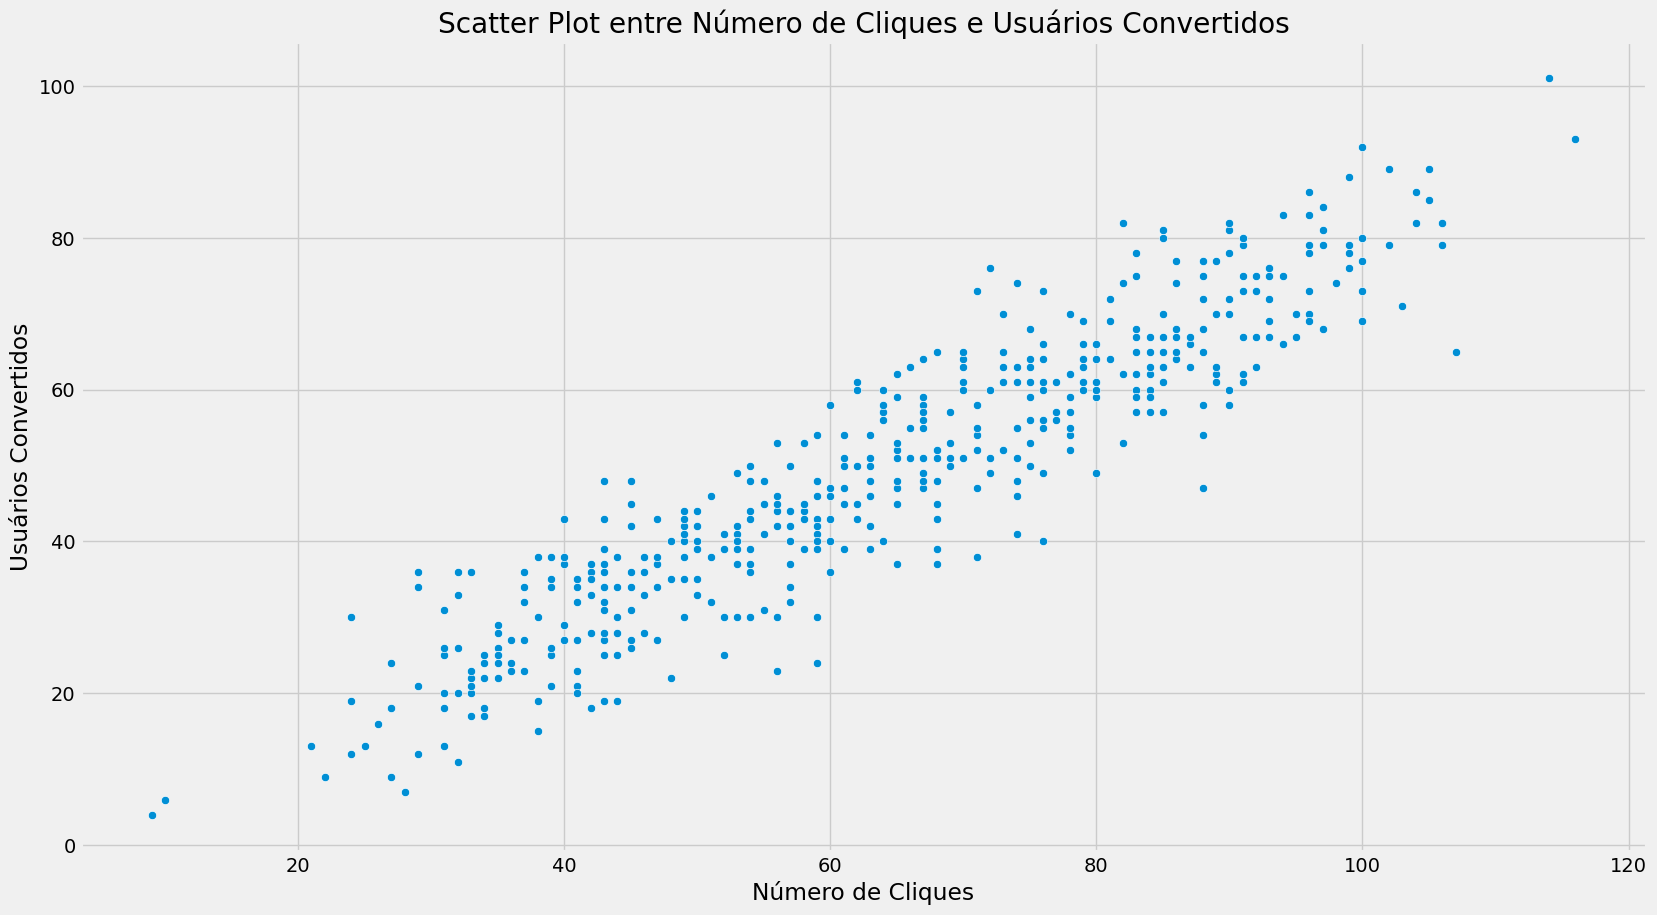

In [30]:
# Plot Scatter Plot entre Número de Cliques e Usuários Convertidos
plt.figure(figsize=(18, 10))
sns.scatterplot(x="numero_cliques", y="usuarios_convertidos", data = data)
plt.title("Scatter Plot entre Número de Cliques e Usuários Convertidos")
plt.xlabel("Número de Cliques")
plt.ylabel("Usuários Convertidos")

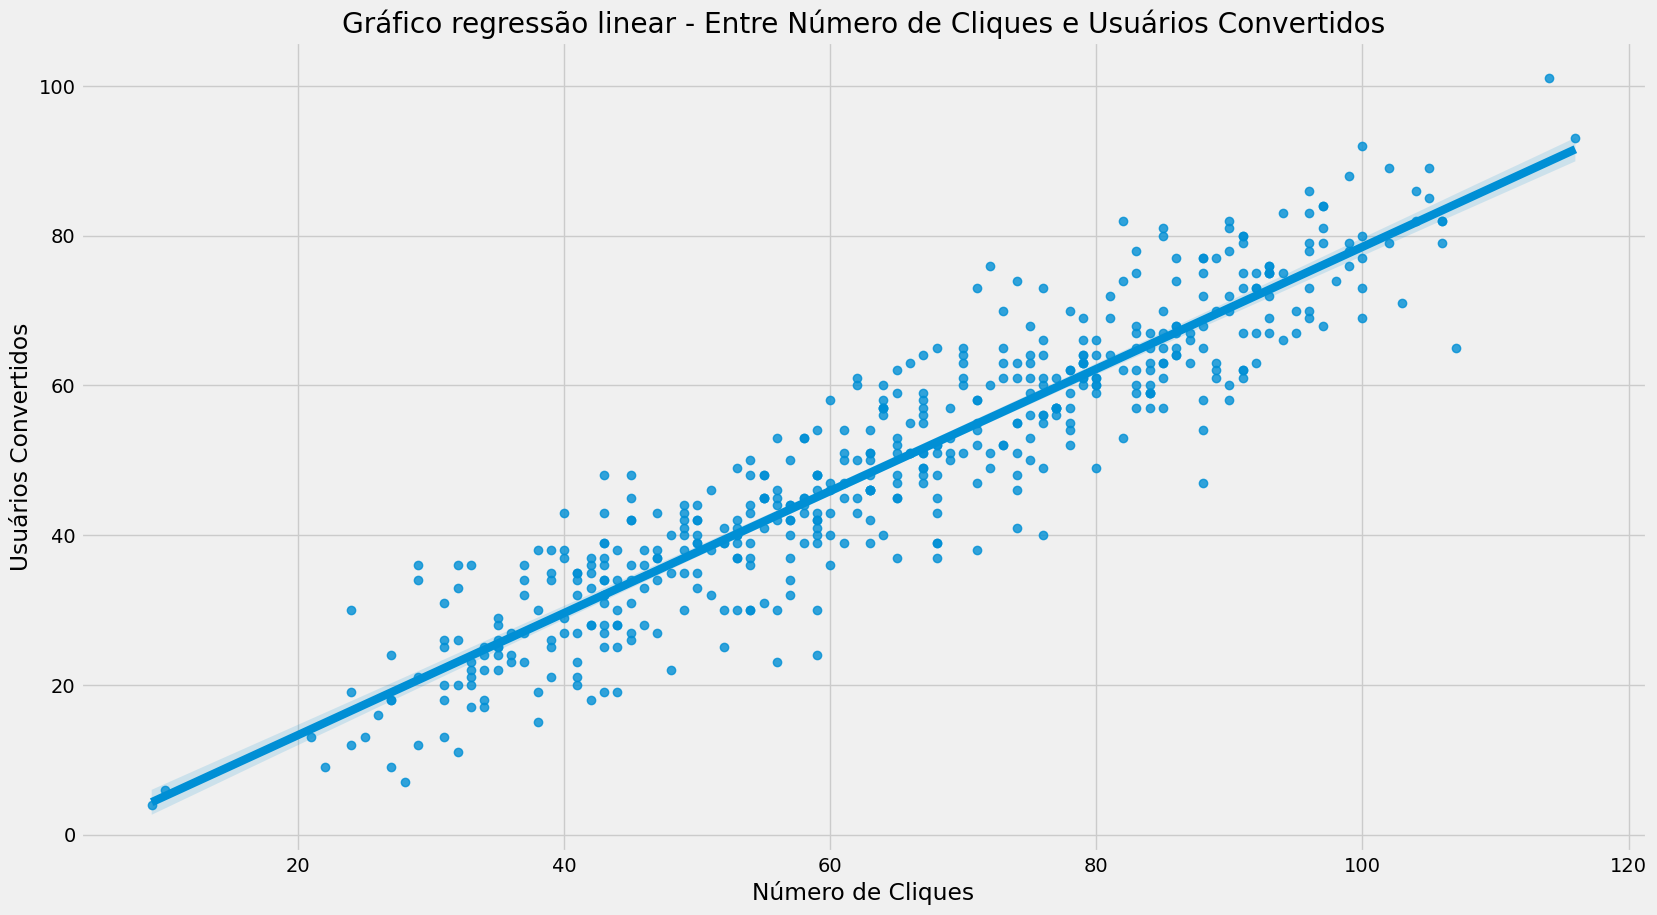

In [39]:
# Plot gráfico regressão linear
plt.figure(figsize=(18, 10))
sns.regplot(x="numero_cliques", y="usuarios_convertidos", data = data)
plt.title("Gráfico regressão linear - Entre Número de Cliques e Usuários Convertidos")
plt.xlabel("Número de Cliques")
plt.ylabel("Usuários Convertidos")

# Exiba o gráfico
plt.show()

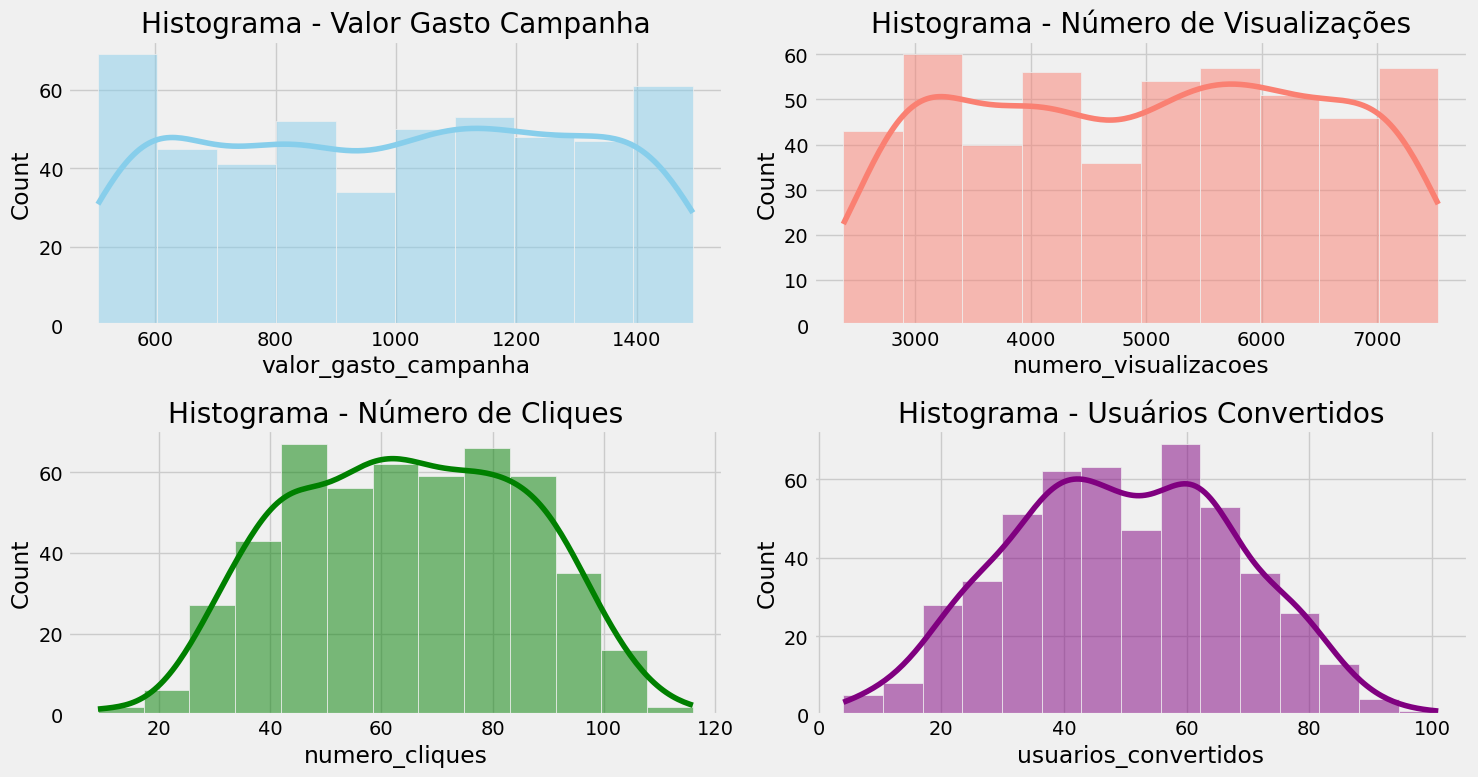

In [54]:
# Crie um subplot com várias figuras (uma para cada coluna)
plt.figure(figsize=(15, 8))
plt.subplot(2, 2, 1)
sns.histplot(data=data, x="valor_gasto_campanha", kde=True, color="skyblue")
plt.title("Histograma - Valor Gasto Campanha")

plt.subplot(2, 2, 2)
sns.histplot(data=data, x="numero_visualizacoes", kde=True, color="salmon")
plt.title("Histograma - Número de Visualizações")

plt.subplot(2, 2, 3)
sns.histplot(data=data, x="numero_cliques", kde=True, color="green")
plt.title("Histograma - Número de Cliques")

plt.subplot(2, 2, 4)
sns.histplot(data=data, x="usuarios_convertidos", kde=True, color="purple")
plt.title("Histograma - Usuários Convertidos")

plt.tight_layout()  # Ajusta automaticamente a disposição dos subplots
plt.show()

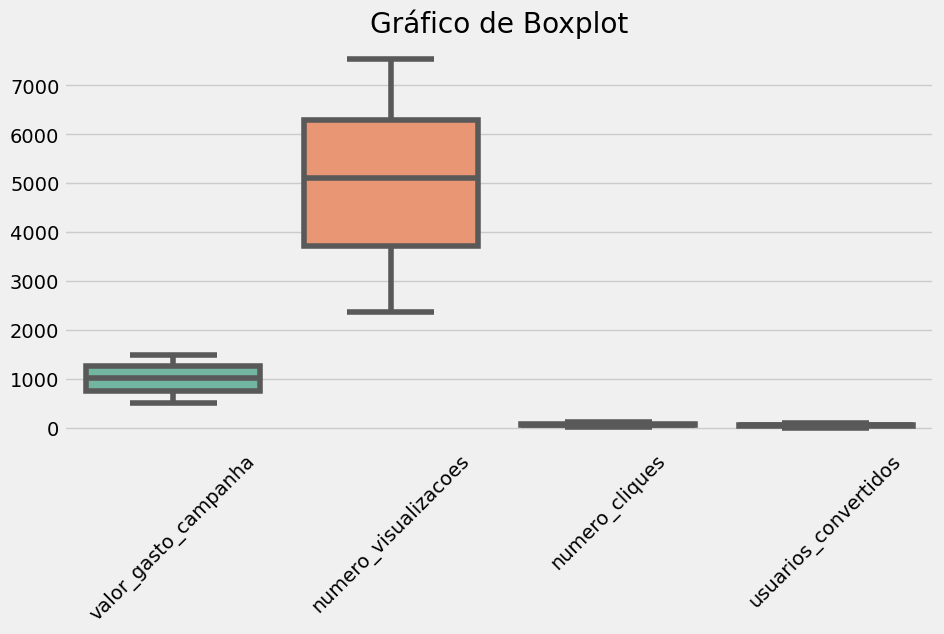

In [50]:
# Plot boxplot erificando outliers dentro dataset
plt.figure(figsize=(10, 5))
sns.boxplot(data=data, palette="Set2")
plt.title("Gráfico de Boxplot")
plt.xticks(rotation=45) 

# Exiba o gráfico
plt.show()

<Axes: xlabel='numero_cliques', ylabel='Compras'>

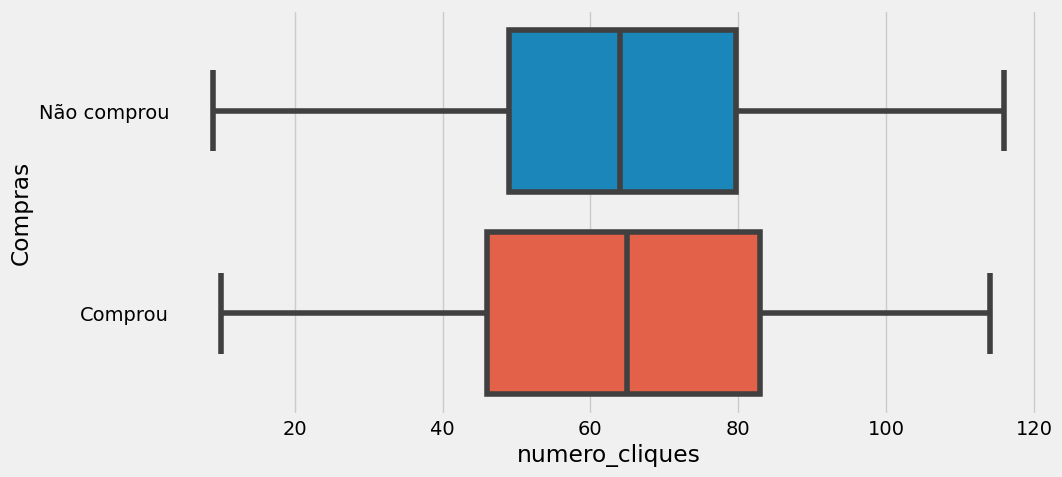

In [43]:
# Plot boxplot erificando outliers dentro dataset
plt.figure(figsize=(10, 5))
sns.boxplot(x="numero_cliques", y="Compras", data = data)
plt.title("Gráfico boxplot - Entre Número de Cliques e compras verificando outliers")
plt.xlabel("Número de Cliques")
plt.ylabel("Usuários Convertidos")

# Exiba o gráfico
plt.show()

## Features modelo 

In [66]:
# Separar as features (X) e o alvo (y)
x = data[["valor_gasto_campanha", "numero_visualizacoes", "numero_cliques"]]
y = data["usuarios_convertidos"]

In [67]:
# Visualizando features (x)
x.shape

(500, 3)

In [68]:
# Visualizando features (y)
y.shape

(500,)

## Treino teste

- Dividir o conjunto de dados em treinamento e teste

In [69]:
# Importando biblioteca treino teste
from sklearn.model_selection import train_test_split

# Dividir o conjunto de dados em treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [70]:
# Visualizando dados treino
X_train.shape

(400, 3)

In [71]:
# Visualizando dados teste
y_train.shape

(400,)

## Modelo regressão linear

In [75]:
%%time

# Importando biblioteca 
from sklearn.linear_model import LinearRegression

# Criar o modelo de regressão linear
model_linear = LinearRegression()

# Treinar o modelo com os dados de treinamento
model_linear_fit = model_linear.fit(X_train, y_train)

# Visualizando modelo
model_linear

CPU times: total: 0 ns
Wall time: 1.63 ms


LinearRegression()

In [77]:
# Score modelo
modelo_score = model_linear.score(X_train, y_train)
print("Model - Linear Regression: %.2f" % (modelo_score * 100))

Model - Linear Regression: 86.12


In [79]:
# Fazer previsões com o conjunto de teste
y_pred = model_linear.predict(X_test)
y_pred

array([46.3021324 , 70.41697183, 16.45210141, 36.8162607 , 56.9738605 ,
       32.82499313, 23.48747428, 27.89516823, 30.25904825, 58.29356253,
       68.47449345, 46.23372148, 31.37606573, 48.61128051, 32.74570565,
       60.90246205, 43.79421591, 52.45569378, 53.79703475, 72.55670265,
       47.82886711, 48.94644668, 74.57023449, 30.8202569 , 67.23262357,
       74.21203363, 23.84082202, 66.94965947, 54.20975947, 32.11199813,
       77.28297458, 64.4096113 , 22.68274219, 39.80932185, 48.65701969,
       19.42956444, 40.87317747, 58.38847047, 46.25286385, 36.84988348,
       63.75992532, 54.28675694, 85.31354587, 56.71754438, 75.12463119,
       25.77816623, 40.62120849, 70.98455099, 34.70311031, 37.80421966,
       13.68170978, 71.55377568, 48.29206697, 30.67866685, 66.91444282,
       71.56359463, 39.97755789, 49.66502124, 51.38595225, 49.92140391,
       37.97319155, 25.59363198, 49.70683434, 57.45019318, 31.949077  ,
       32.53105465, 46.9210452 , 40.62465592, 57.85710847, 47.83

In [129]:
# Calcular os resíduos
residuals = y_test - y_pred
residuals

361    11.697868
73      4.583028
374    -0.452101
155   -14.816261
104    13.026139
         ...    
347    -0.423216
86      9.698623
75     -0.994447
438    13.929513
15      0.965823
Name: usuarios_convertidos, Length: 100, dtype: float64

In [131]:
# Coeficientes do modelo
coefficients = model_linear.coef_
intercept = model_linear.intercept_
residuals = y_test - y_pred

print("Coeficientes:", coefficients)
print()
print("Intercept:", intercept)
print()
print("Residuals", residuals)

Coeficientes: [ 0.01499283 -0.00547975  0.96851917]

Intercept: -0.7414740404690932

Residuals 361    11.697868
73      4.583028
374    -0.452101
155   -14.816261
104    13.026139
         ...    
347    -0.423216
86      9.698623
75     -0.994447
438    13.929513
15      0.965823
Name: usuarios_convertidos, Length: 100, dtype: float64


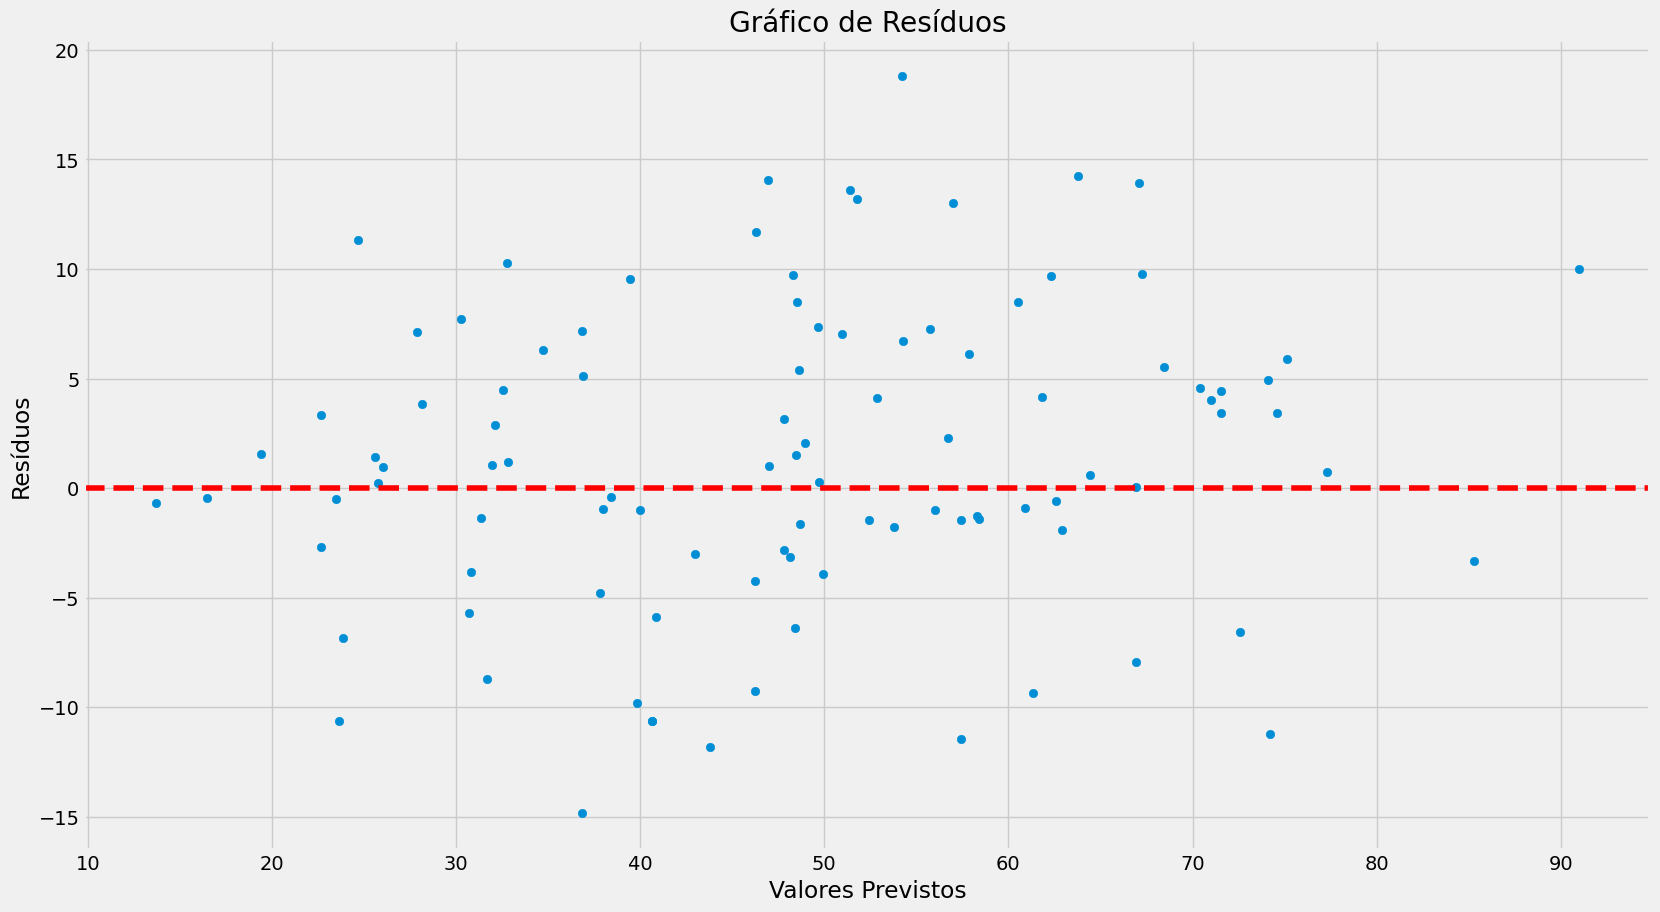

In [102]:
# Plot Resíduos
plt.figure(figsize=(18, 10))
plt.scatter(y_pred, residuals)
plt.xlabel("Valores Previstos")
plt.ylabel("Resíduos")
plt.title("Gráfico de Resíduos")
plt.axhline(y=0, color='r', linestyle='--')
plt.show()

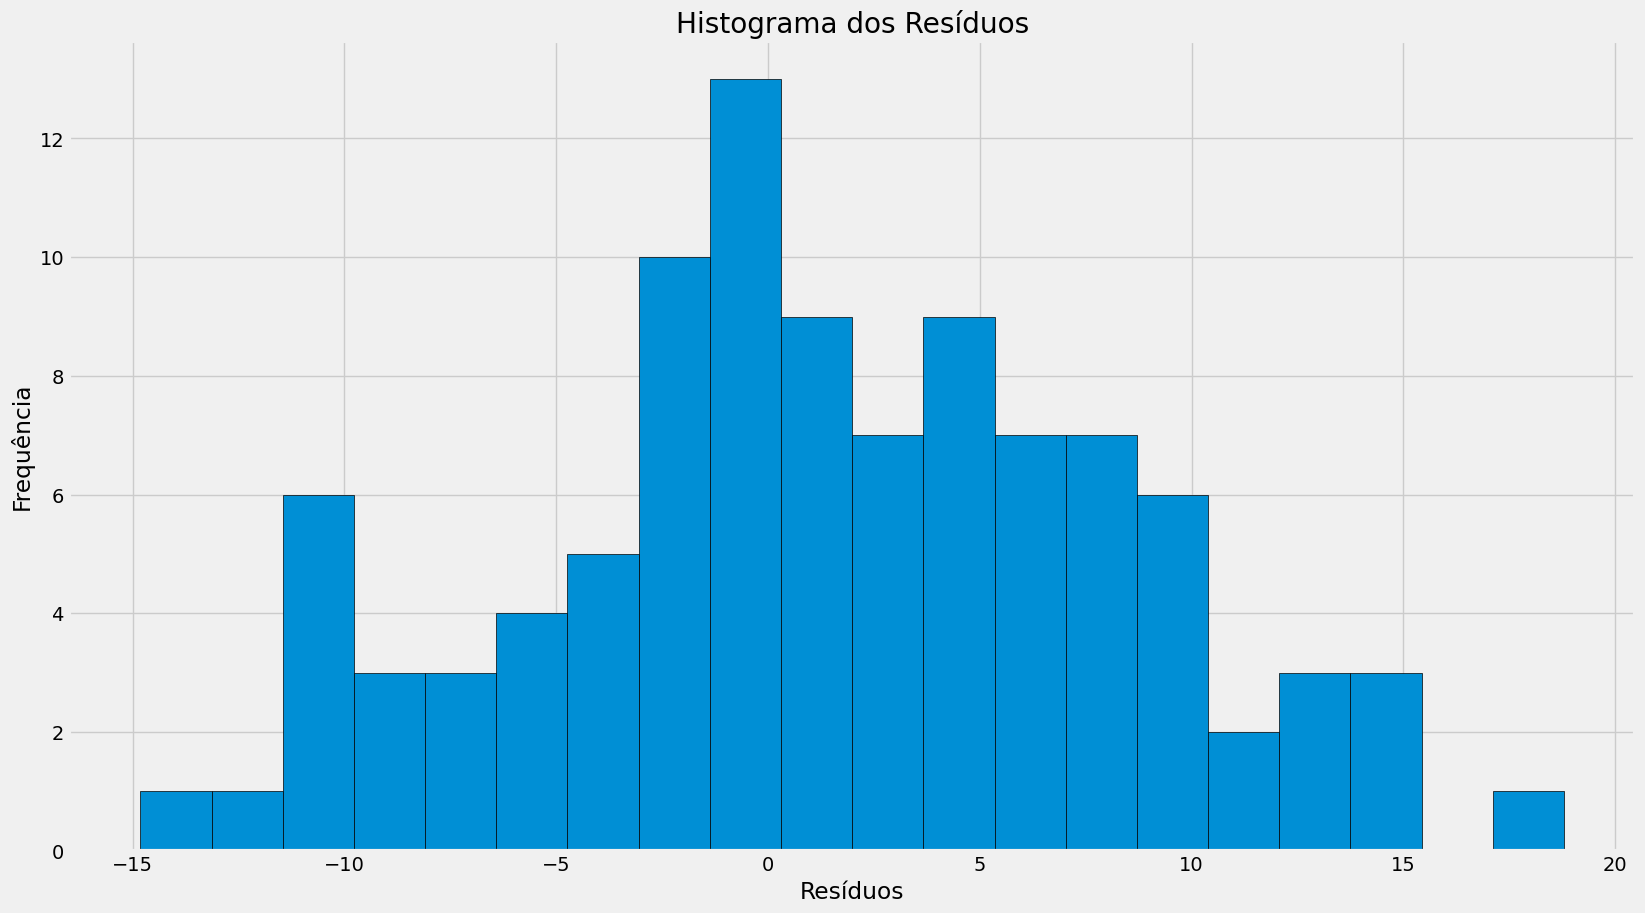

In [104]:
# Plot histograma dos resíduos
plt.figure(figsize=(18, 10))
plt.hist(residuals, bins=20, edgecolor='k')
plt.xlabel("Resíduos")
plt.ylabel("Frequência")
plt.title("Histograma dos Resíduos")
plt.show()

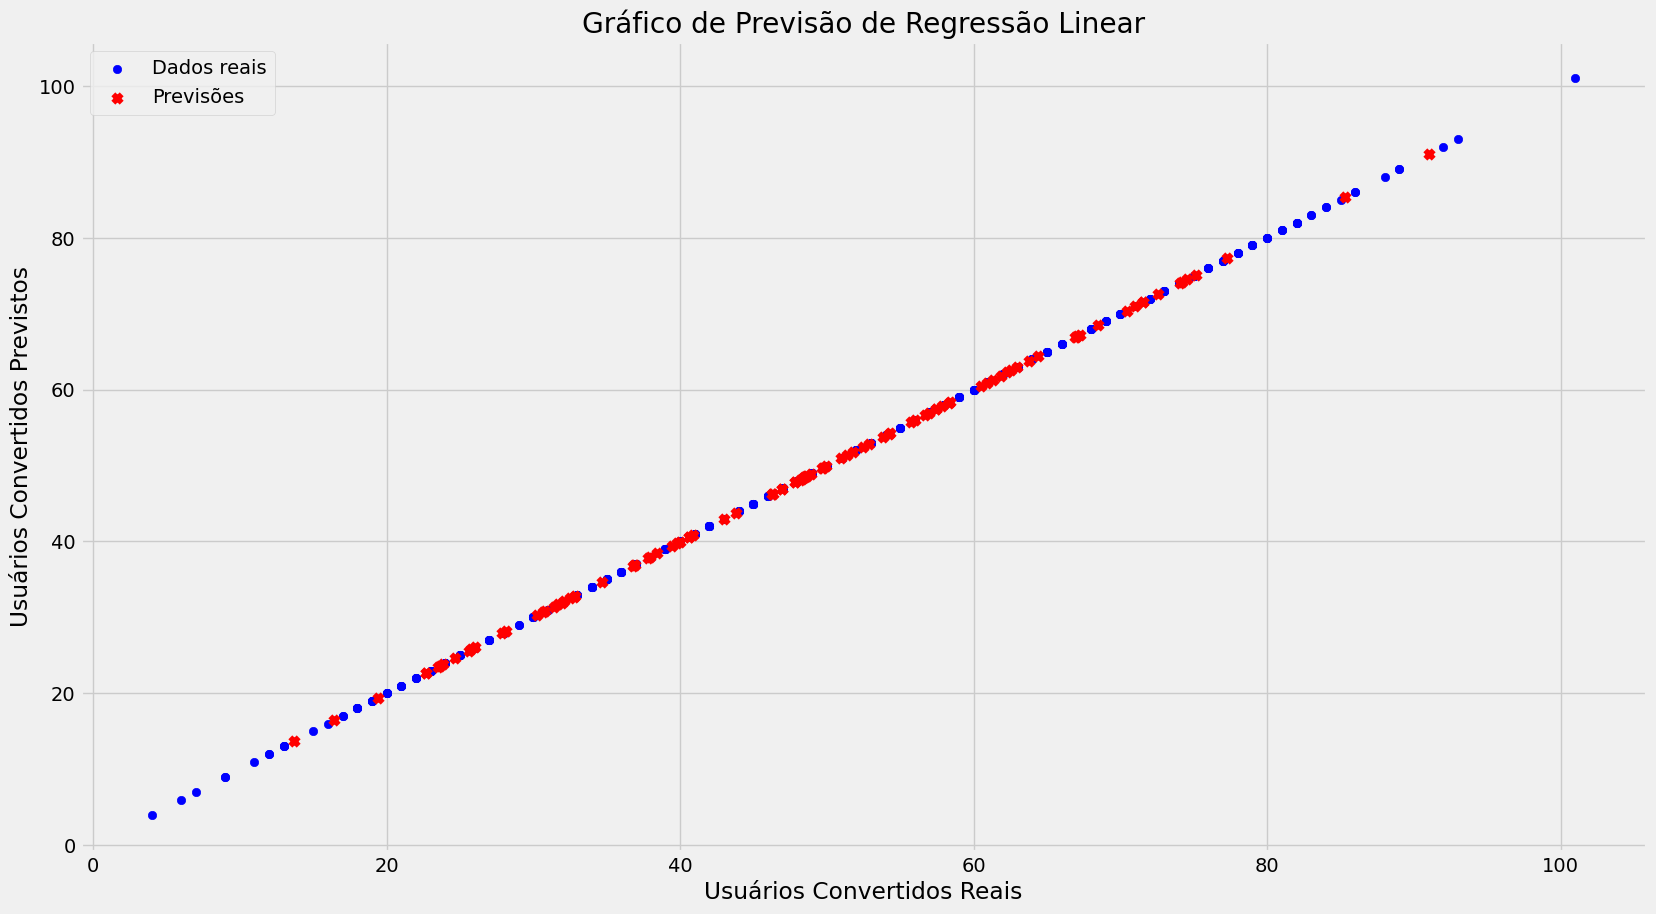

In [105]:
# Plotar os dados reais e as previsões
plt.figure(figsize=(18, 10))
plt.scatter(y, y, color='blue', label='Dados reais', marker='o')
plt.scatter(y_pred, y_pred, color='red', label='Previsões', marker='x')
plt.xlabel('Usuários Convertidos Reais')
plt.ylabel('Usuários Convertidos Previstos')
plt.legend()
plt.title('Gráfico de Previsão de Regressão Linear')
plt.grid(True)
plt.show()

In [89]:
# Plot QQ-plot
#import statsmodels.api as sm

# Criar o QQ-plot
#sm.qqplot(residuals, line='s')
#plt.title("QQ-Plot dos Resíduos")
#plt.show()

In [111]:
# Métricas de avaliação
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

mae = mean_absolute_error(y_test, y_pred)
mse_residuals = np.mean(residuals**2)
r2 = model_linear.score(x, y)

print(f"Coeficiente de Determinação (R²): {r2:.2f}")
print("Mean Squared Error (MSE) dos Resíduos:", mse_residuals)
print("Mean Absolute Error (MAE):", mae)

Coeficiente de Determinação (R²): 0.86
Mean Squared Error (MSE) dos Resíduos: 49.51472171833978
Mean Absolute Error (MAE): 5.583469187153534


In [114]:
# Salvando modelo
import joblib

# Salvar o modelo em um arquivo .pkl
joblib.dump(model_linear, 'modelo_regressão_linear.pkl')

['modelo_regressão_linear.pkl']

## Deploy modelo

In [117]:
# Carregar o modelo do disco
modelo = joblib.load("modelo_regressão_linear.pkl")

In [118]:
# Novos dados
valor_gasto_campanha = 1350
numero_visualizacoes = 7300
numero_cliques = 100

In [127]:
# Criar novos dados para previsão com as 3 características esperadas
novos_dados = np.array([[valor_gasto_campanha, numero_visualizacoes, numero_cliques]])

In [128]:
# Fazer previsões
previsoes = modelo.predict(novos_dados)

# Exibir previsões
print(f"Esperamos este número de usuários convertidos: {int(previsoes[0])}")

Esperamos este número de usuários convertidos: 76


## Conclusão

# Refrências

# Citação